In [1]:
#結果をインライン表示するための関数
from IPython.display import display, Image
def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [50]:
def face_count(image_path,file):
    #RGB値をarrayに格納してpythonで扱えるように
    image=cv2.imread(image_path) 
#     display_cv_image(image)
    #グレースケールに変換
    image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #顔認識特徴量のファイル指定
    cascade_path = "./haarcascades/haarcascade_frontalface_alt.xml"
    #カスケード分類器の特徴量を取得
    cascade=cv2.CascadeClassifier(cascade_path)
    #顔認識の実行
    facerecog=cascade.detectMultiScale(image_gray,scaleFactor=1.1, minNeighbors=2, minSize=(1, 1))
    #　認識した顔を囲む矩形の色を指定。ここでは白。
    color = (255, 255, 255) 
    if len(facerecog) > 0:
        # 認識した顔全てを矩形で囲む
        for i,rect in enumerate(facerecog):
            # 認識結果を表示
            print ("認識結果")
            print ("(x,y)=(" + str(rect[0]) + "," + str(rect[1])+ ")" + \
                "  高さ："+str(rect[2]) + \
                "  幅："+str(rect[3]))
            x = rect[0]
            y = rect[1]
            w = rect[2]
            h = rect[3]
            # img[y: y + h, x: x + w] 
            cv2.rectangle(image, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)
            #結果の画像を保存するなら以下のコメントアウトを外す
            cv2.imwrite('1/{0}_{1}.jpg'.format(file,i), image[y:y+h, x:x+w])
        # 認識結果の出力
#         display_cv_image(image)
        return len(facerecog)
    else:
        print('顔無し!!!')
        return -1
    # cv2.imwrite("result.jpg", image)

In [51]:
files=os.listdir('ImagesFromTwitter/')

In [52]:
len(files)

906

In [53]:
files[0]

'DSmJMNyVMAAVGSn.jpg'

In [54]:
# image=cv2.imread('ImagesFromTwitter/'+files[0]) 
# display_cv_image(image)

In [55]:
for file in files:
    count=face_count('ImagesFromTwitter/'+file,file)
    print(count)

顔無し!!!
-1
認識結果
(x,y)=(260,271)  高さ：81  幅：81
1
顔無し!!!
-1
顔無し!!!
-1
認識結果
(x,y)=(595,610)  高さ：44  幅：44
認識結果
(x,y)=(503,647)  高さ：65  幅：65
2
顔無し!!!
-1
認識結果
(x,y)=(555,257)  高さ：61  幅：61
1
認識結果
(x,y)=(302,377)  高さ：197  幅：197
認識結果
(x,y)=(354,502)  高さ：225  幅：225
2
認識結果
(x,y)=(216,468)  高さ：26  幅：26
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
認識結果
(x,y)=(318,294)  高さ：180  幅：180
1
認識結果
(x,y)=(398,240)  高さ：156  幅：156
1
認識結果
(x,y)=(40,333)  高さ：271  幅：271
認識結果
(x,y)=(65,427)  高さ：182  幅：182
2
認識結果
(x,y)=(748,489)  高さ：201  幅：201
認識結果
(x,y)=(8,1074)  高さ：58  幅：58
認識結果
(x,y)=(182,1017)  高さ：63  幅：63
3
認識結果
(x,y)=(119,174)  高さ：257  幅：257
認識結果
(x,y)=(366,270)  高さ：258  幅：258
2
認識結果
(x,y)=(581,861)  高さ：44  幅：44
認識結果
(x,y)=(321,1238)  高さ：25  幅：25
2
顔無し!!!
-1
認識結果
(x,y)=(443,246)  高さ：280  幅：280
認識結果
(x,y)=(338,289)  高さ：122  幅：122
認識結果
(x,y)=(66,310)  高さ：252  幅：252
3
顔無し!!!
-1
認識結果
(x,y)=(458,515)  高さ：174  幅：174
認識結果
(x,y)=(198,467)  高さ：168  幅：168
認識結果
(x,y)=(765,465)  高さ：174  幅：174
認識結果
(x,y)=(723,847)  高さ：155  幅：155
認識結果
(

In [56]:
from PIL import Image
import numpy as np
from matplotlib import pylab as plt

In [57]:
res_files=os.listdir('1/')

In [63]:
images=[]
for i in range(500):
    images.append(np.array(Image.open('1/'+res_files[i])))

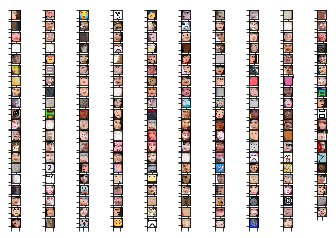

In [65]:
for i in range(1, 200):
    plt.subplot(20, 10, i)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.imshow( images[i - 1] )

In [61]:
len(res_files)

851